In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

### Load CIFAR10 Dataset

CIFAR10 is one of the most famous datasets in the field of machine learning

- It has 60,000 images
- Very straight forward to download
- Images dimensions are 32x32
- Colour images
- 10 classes

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2024-11-03 14:43:22.095143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-03 14:43:22.657336: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-03 14:43:22.735709: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-03 14:43:22.735804: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

### Data Visualization

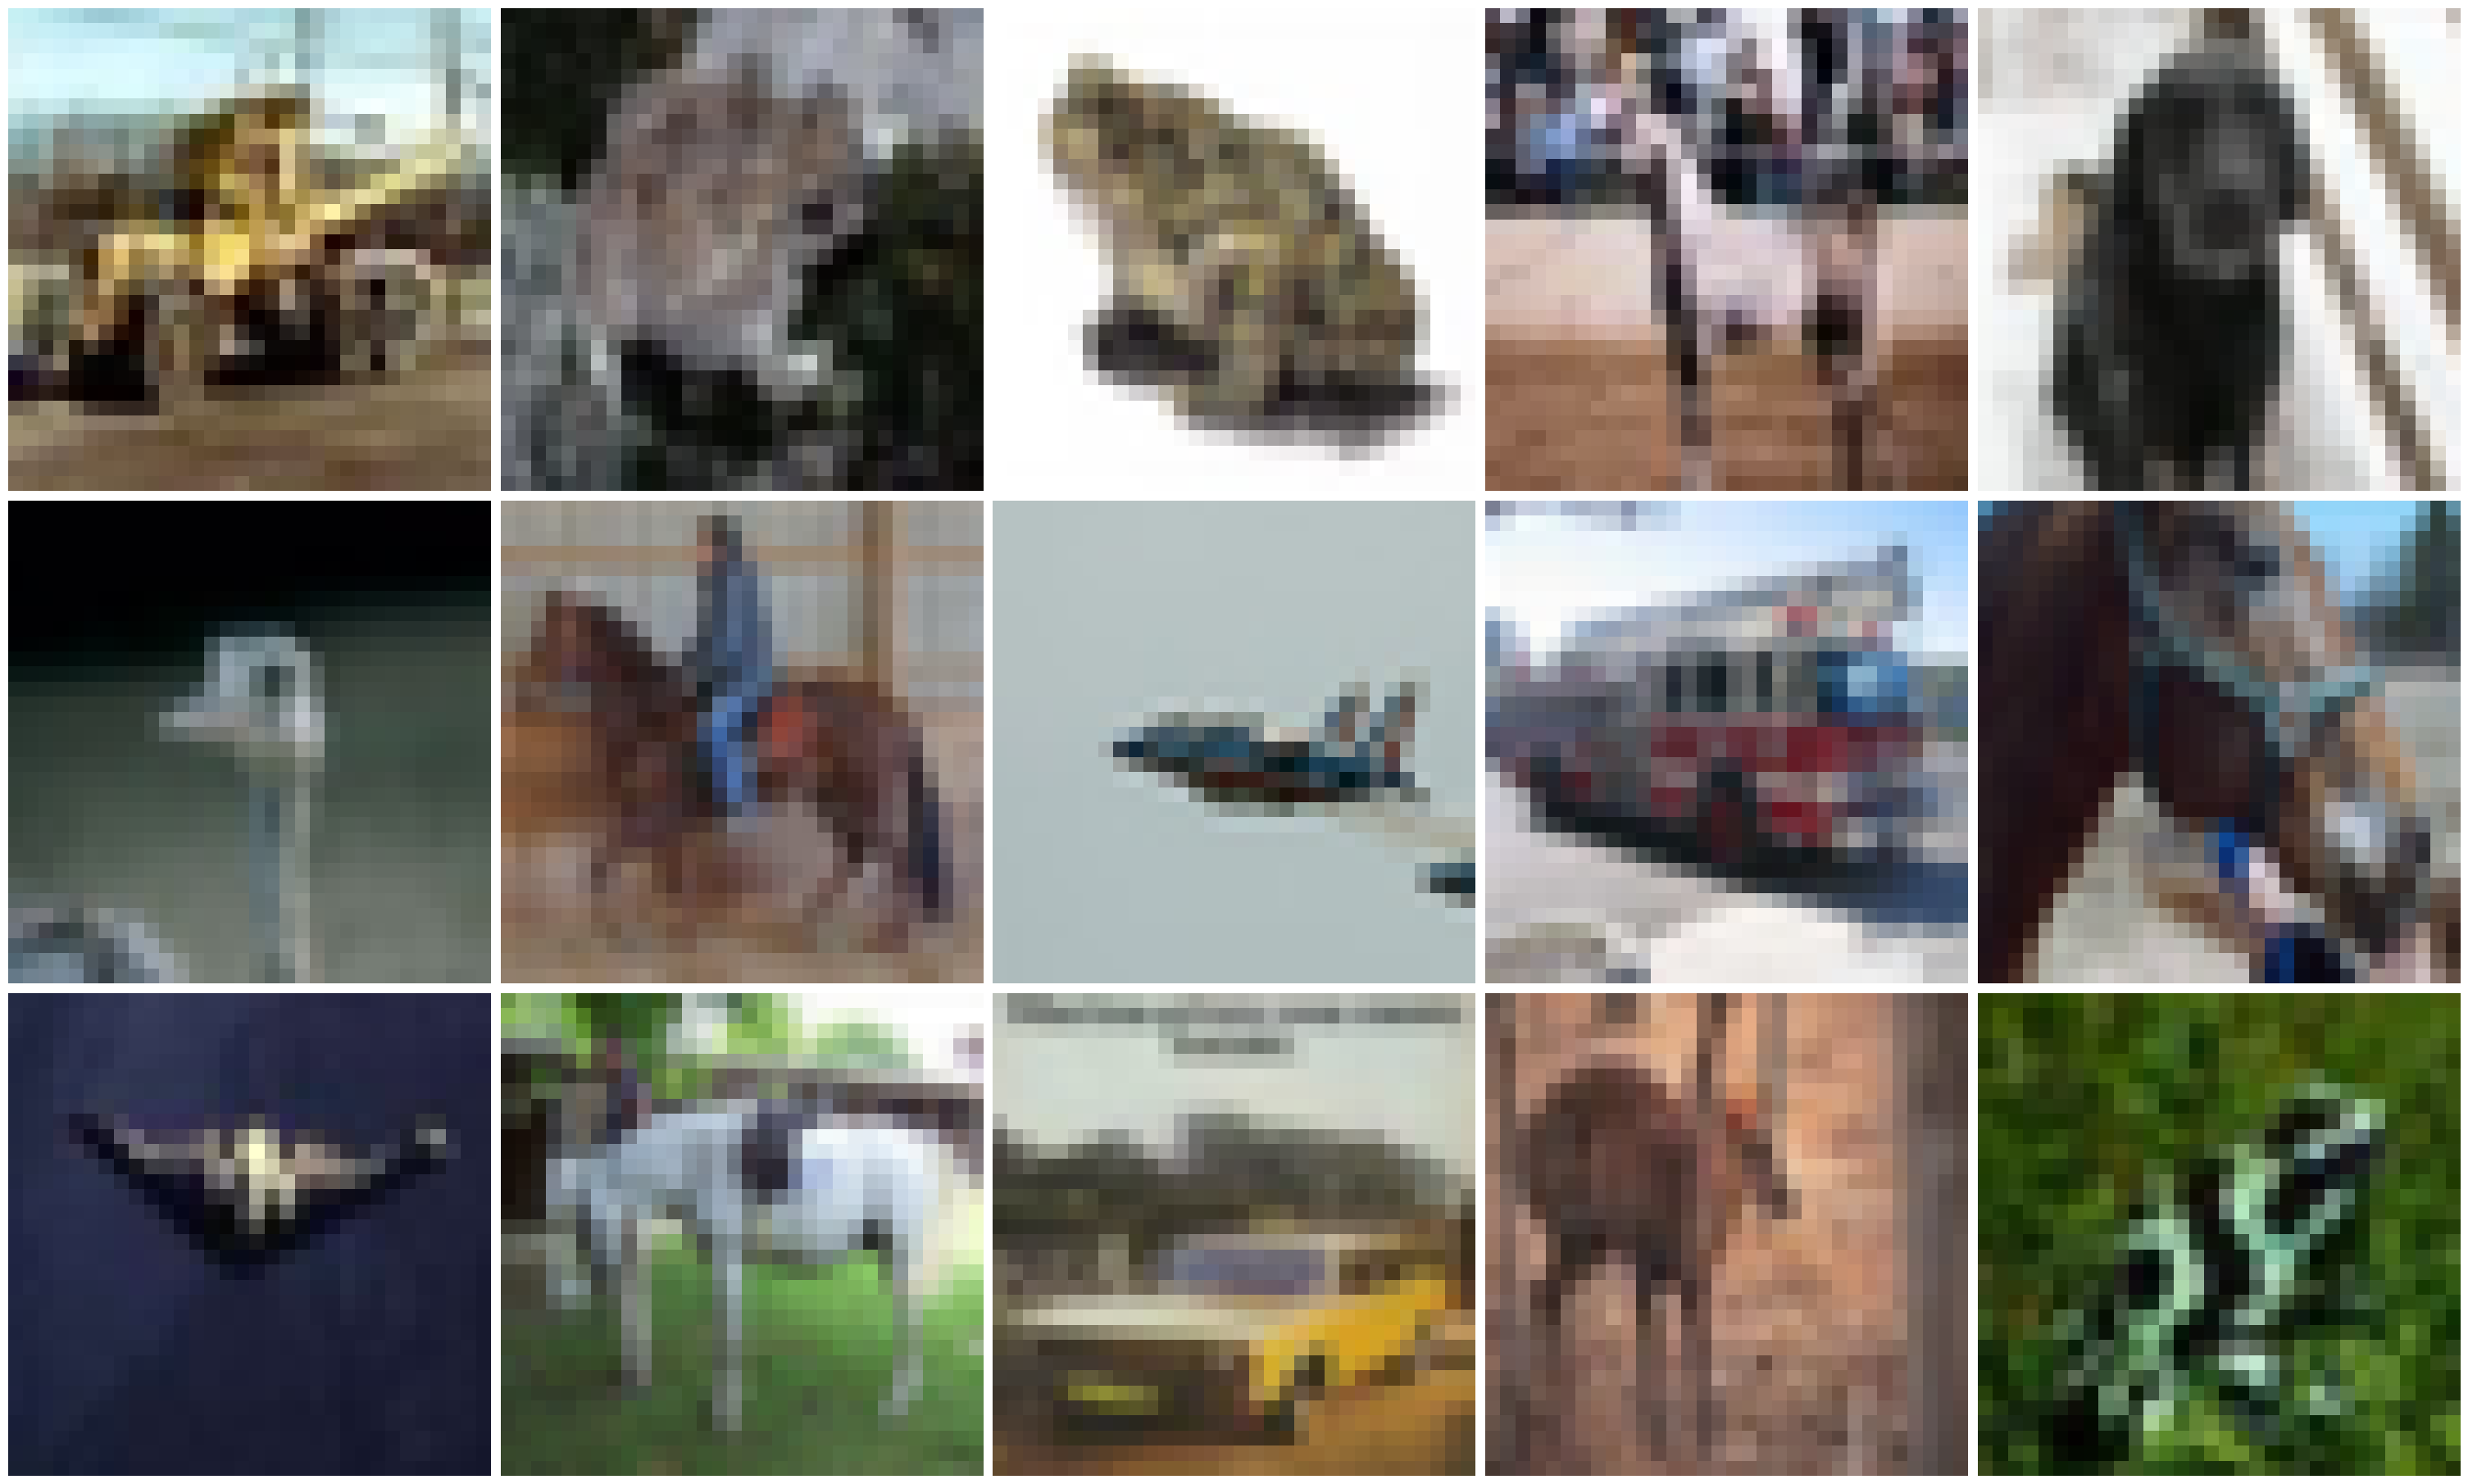

In [3]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_train[j])
    axs.flat[i].axis('off')
 
plt.show()

### Split Data (Validation Data)

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print("x_train shape:",x_train.shape)
print("x_valid shape:",x_valid.shape)
print("x_test shape:",x_test.shape)

x_train shape: (45000, 32, 32, 3)
x_valid shape: (5000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### Normalize Data 

In [5]:
mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))

x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

### One-Hot Encoding for Labels

In [6]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

### Model Architecture and Compile

In [14]:
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.metrics import F1Score

model = Sequential()

# conv1
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False, input_shape=(32,32,3), name='conv1'))
model.add(BatchNormalization(name='conv1_bn'))
model.add(ReLU(name='conv1_relu'))

# conv_dw_1
model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_1'))
model.add(BatchNormalization(name='conv_dw_1_bn'))
model.add(ReLU(name='conv_dw_1_relu'))

# conv_pw_1
model.add(Conv2D(filters=64, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_1'))
model.add(BatchNormalization(name='conv_pw_1_bn'))
model.add(ReLU(name='conv_pw_1_relu'))

# conv_dw_2
model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False, name='conv_dw_2'))
model.add(BatchNormalization(name='conv_dw_2_bn'))
model.add(ReLU(name='conv_dw_2_relu'))

# conv_pw_2
model.add(Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_2'))
model.add(BatchNormalization(name='conv_pw_2_bn'))
model.add(ReLU(name='conv_pw_2_relu'))

# # conv_dw_3
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_3'))
# model.add(BatchNormalization(name='conv_dw_3_bn'))
# model.add(ReLU(name='conv_dw_3_relu'))

# # conv_pw_3
# model.add(Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_3'))
# model.add(BatchNormalization(name='conv_pw_3_bn'))
# model.add(ReLU(name='conv_pw_3_relu'))

# # conv_dw_4
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False, name='conv_dw_4'))
# model.add(BatchNormalization(name='conv_dw_4_bn'))
# model.add(ReLU(name='conv_dw_4_relu'))

# # conv_pw_4
# model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_4'))
# model.add(BatchNormalization(name='conv_pw_4_bn'))
# model.add(ReLU(name='conv_pw_4_relu'))

# # conv_dw_5
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_5'))
# model.add(BatchNormalization(name='conv_dw_5_bn'))
# model.add(ReLU(name='conv_dw_5_relu'))

# # conv_pw_5
# model.add(Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_5'))
# model.add(BatchNormalization(name='conv_pw_5_bn'))
# model.add(ReLU(name='conv_pw_5_relu'))

# # conv_dw_6
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False, name='conv_dw_6'))
# model.add(BatchNormalization(name='conv_dw_6_bn'))
# model.add(ReLU(name='conv_dw_6_relu'))

# # conv_pw_6
# model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_6'))
# model.add(BatchNormalization(name='conv_pw_6_bn'))
# model.add(ReLU(name='conv_pw_6_relu'))

# # conv_dw_7
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_7'))
# model.add(BatchNormalization(name='conv_dw_7_bn'))
# model.add(ReLU(name='conv_dw_7_relu'))

# # conv_pw_7
# model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_7'))
# model.add(BatchNormalization(name='conv_pw_7_bn'))
# model.add(ReLU(name='conv_pw_7_relu'))

# # conv_dw_8
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_8'))
# model.add(BatchNormalization(name='conv_dw_8_bn'))
# model.add(ReLU(name='conv_dw_8_relu'))

# # conv_pw_8
# model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_8'))
# model.add(BatchNormalization(name='conv_pw_8_bn'))
# model.add(ReLU(name='conv_pw_8_relu'))

# # conv_dw_9
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_9'))
# model.add(BatchNormalization(name='conv_dw_9_bn'))
# model.add(ReLU(name='conv_dw_9_relu'))

# # conv_pw_9
# model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_9'))
# model.add(BatchNormalization(name='conv_pw_9_bn'))
# model.add(ReLU(name='conv_pw_9_relu'))

# # conv_dw_10
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_10'))
# model.add(BatchNormalization(name='conv_dw_10_bn'))
# model.add(ReLU(name='conv_dw_10_relu'))

# # conv_pw_10
# model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_10'))
# model.add(BatchNormalization(name='conv_pw_10_bn'))
# model.add(ReLU(name='conv_pw_10_relu'))

# # conv_dw_11
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_11'))
# model.add(BatchNormalization(name='conv_dw_11_bn'))
# model.add(ReLU(name='conv_dw_11_relu'))

# # conv_pw_11
# model.add(Conv2D(filters=512, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_11'))
# model.add(BatchNormalization(name='conv_pw_11_bn'))
# model.add(ReLU(name='conv_pw_11_relu'))

# # conv_dw_12
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(2,2), padding='same', use_bias=False, name='conv_dw_12'))
# model.add(BatchNormalization(name='conv_dw_12_bn'))
# model.add(ReLU(name='conv_dw_12_relu'))

# # conv_pw_12
# model.add(Conv2D(filters=1024, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_12'))
# model.add(BatchNormalization(name='conv_pw_12_bn'))
# model.add(ReLU(name='conv_pw_12_relu'))

# # conv_dw_13
# model.add(DepthwiseConv2D(kernel_size=(3,3), strides=(1,1), padding='same', use_bias=False, name='conv_dw_13'))
# model.add(BatchNormalization(name='conv_dw_13_bn'))
# model.add(ReLU(name='conv_dw_13_relu'))

# # conv_pw_13
# model.add(Conv2D(filters=1024, kernel_size=(1,1), strides=(1,1), padding='same', use_bias=False, name='conv_pw_13'))
# model.add(BatchNormalization(name='conv_pw_13_bn'))
# model.add(ReLU(name='conv_pw_13_relu'))

# Global Average Pooling
model.add(GlobalAveragePooling2D(name='global_average_pooling'))

# # Dense and Output
# model.add(Dense(units=256, activation='relu', name='dense'))
# model.add(BatchNormalization(name='dense_bn'))
# model.add(Dropout(rate=0.5, name='dropout'))
model.add(Dense(units=10, activation='softmax', name='output'))

# Compile the model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='categorical_crossentropy',
#               metrics=['accuracy', F1Score(average='weighted')])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128       
 ation)                                                          
                                                                 
 conv_dw_1_relu (ReLU)       (None, 16, 16, 32)       

### Train

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

batch_size = 32
epochs = 50

optimizer_adam = Adam(learning_rate=0.001)
MCP = ModelCheckpoint(filepath='weights/testing_VivadoAccelerator.keras', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer=optimizer_adam, metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_valid, y_valid),
                 callbacks=[MCP], verbose=2, shuffle=True)

Epoch 1/50

Epoch 1: val_loss improved from inf to 1.37698, saving model to weights/testing_VivadoAccelerator.keras
1407/1407 - 23s - loss: 1.5642 - accuracy: 0.4330 - val_loss: 1.3770 - val_accuracy: 0.5126 - 23s/epoch - 16ms/step
Epoch 2/50

Epoch 2: val_loss improved from 1.37698 to 1.33527, saving model to weights/testing_VivadoAccelerator.keras
1407/1407 - 18s - loss: 1.3233 - accuracy: 0.5242 - val_loss: 1.3353 - val_accuracy: 0.5214 - 18s/epoch - 13ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.33527 to 1.18475, saving model to weights/testing_VivadoAccelerator.keras
1407/1407 - 19s - loss: 1.2206 - accuracy: 0.5648 - val_loss: 1.1847 - val_accuracy: 0.5806 - 19s/epoch - 13ms/step
Epoch 4/50

Epoch 4: val_loss did not improve from 1.18475
1407/1407 - 19s - loss: 1.1503 - accuracy: 0.5909 - val_loss: 1.2048 - val_accuracy: 0.5672 - 19s/epoch - 14ms/step
Epoch 5/50

Epoch 5: val_loss improved from 1.18475 to 1.11842, saving model to weights/testing_VivadoAccelerator.keras
1

### Load Best Weights

In [21]:
model.load_weights('weights/testing_VivadoAccelerator.keras')

### Accuracy on Test Set

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {round(100*score[0],4)}%\nTest Accuracy: {round(100*score[1],4)}%")

Test Loss: 86.2673%
Test Accuracy: 70.13%


### Some Predictions

In [23]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 2s 5ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

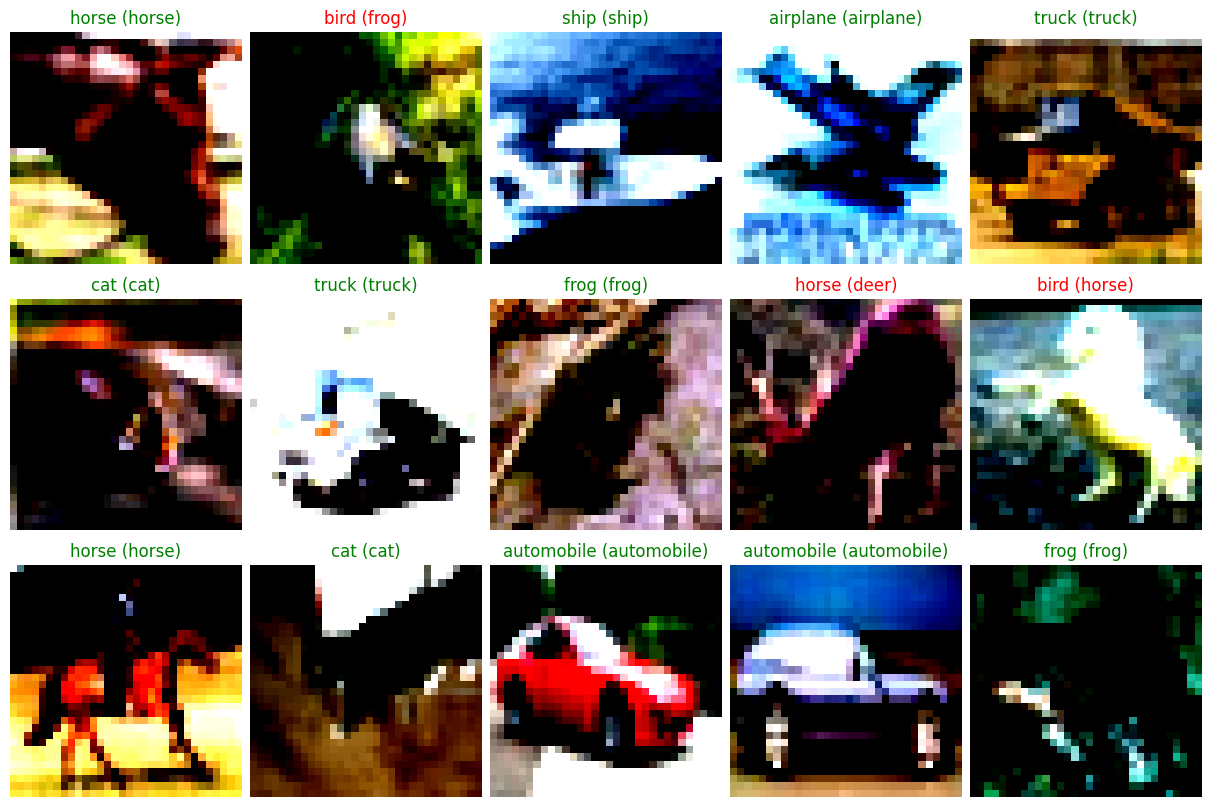

In [24]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(12,8))
for i,j in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_test[j])
    axs.flat[i].axis('off')
    pred_idx = np.argmax(y_hat[j])
    true_idx = np.argmax(y_test[j])
    axs.flat[i].set_title("{0} ({1})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                          color='green' if pred_idx == true_idx else 'red')

### HLS4ML Flow

- Create a model configuration
- Convert Keras model to hls4ml model based on the provided configuration

In [25]:
import hls4ml

hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name', backend='Vitis')

# Set the precision and reuse factor for the full model
hls_config['Model']['Precision'] = 'ap_fixed<8,4>'
hls_config['Model']['ReuseFactor'] = 1

# Create an entry for each layer, here you can for instance change the strategy for a layer to 'resource'
# or increase the reuse factor individually for large layers.
# In this case, we designed the model to be small enough for a fully parallel implementation
# so we use the latency strategy and reuse factor of 1 for all layers.
for Layer in hls_config['LayerName'].keys():
    hls_config['LayerName'][Layer]['Strategy'] = 'Latency'
    hls_config['LayerName'][Layer]['ReuseFactor'] = 1
# If you want best numerical performance for high-accuray models, while the default latency strategy is faster but numerically more unstable
hls_config['LayerName']['output_softmax']['Strategy'] = 'Stable'

cfg = hls4ml.converters.create_config(backend='VivadoAccelerator')
cfg['IOType'] = 'io_stream'  # Must set this if using CNNs!
cfg['HLSConfig'] = hls_config
cfg['KerasModel'] = model
cfg['OutputDir'] = '../projects/testing_VivadoAccelerator'
cfg['XilinxPart'] = "xc7z020clg400-1"

hls_model = hls4ml.converters.keras_to_hls(cfg)
hls_model.compile()

# # First, the baseline model
# hls_config = hls4ml.utils.config_from_keras_model(model, granularity='name', backend='Vitis', default_precision='ap_fixed<16,6>' )


# hls_model = hls4ml.converters.convert_from_keras_model(
#     model, hls_config=hls_config, backend='Vitis', output_dir='../projects/testing', part='xc7z020clg400-1'
# )
# hls_model = hls4ml.converters.keras_to_hls(model,
#                                            config=hls_config,
#                                            output_dir='../projects/testing',
#                                            backend='Vitis',
#                                            part='xc7z020clg400-1',
#                                            io_type='io_stream'
#                                           )
# hls_model.compile()

Interpreting Sequential
Topology:
Layer name: conv1_input, layer type: InputLayer, input shapes: [[None, 32, 32, 3]], output shape: [None, 32, 32, 3]
Layer name: conv1, layer type: Conv2D, input shapes: [[None, 32, 32, 3]], output shape: [None, 16, 16, 32]
Layer name: conv1_bn, layer type: BatchNormalization, input shapes: [[None, 16, 16, 32]], output shape: [None, 16, 16, 32]
Layer name: conv1_relu, layer type: Activation, input shapes: [[None, 16, 16, 32]], output shape: [None, 16, 16, 32]
Layer name: conv_dw_1, layer type: DepthwiseConv2D, input shapes: [[None, 16, 16, 32]], output shape: [None, 16, 16, 32]
Layer name: conv_dw_1_bn, layer type: BatchNormalization, input shapes: [[None, 16, 16, 32]], output shape: [None, 16, 16, 32]
Layer name: conv_dw_1_relu, layer type: Activation, input shapes: [[None, 16, 16, 32]], output shape: [None, 16, 16, 32]
Layer name: conv_pw_1, layer type: Conv2D, input shapes: [[None, 16, 16, 32]], output shape: [None, 16, 16, 64]
Layer name: conv_pw_1_

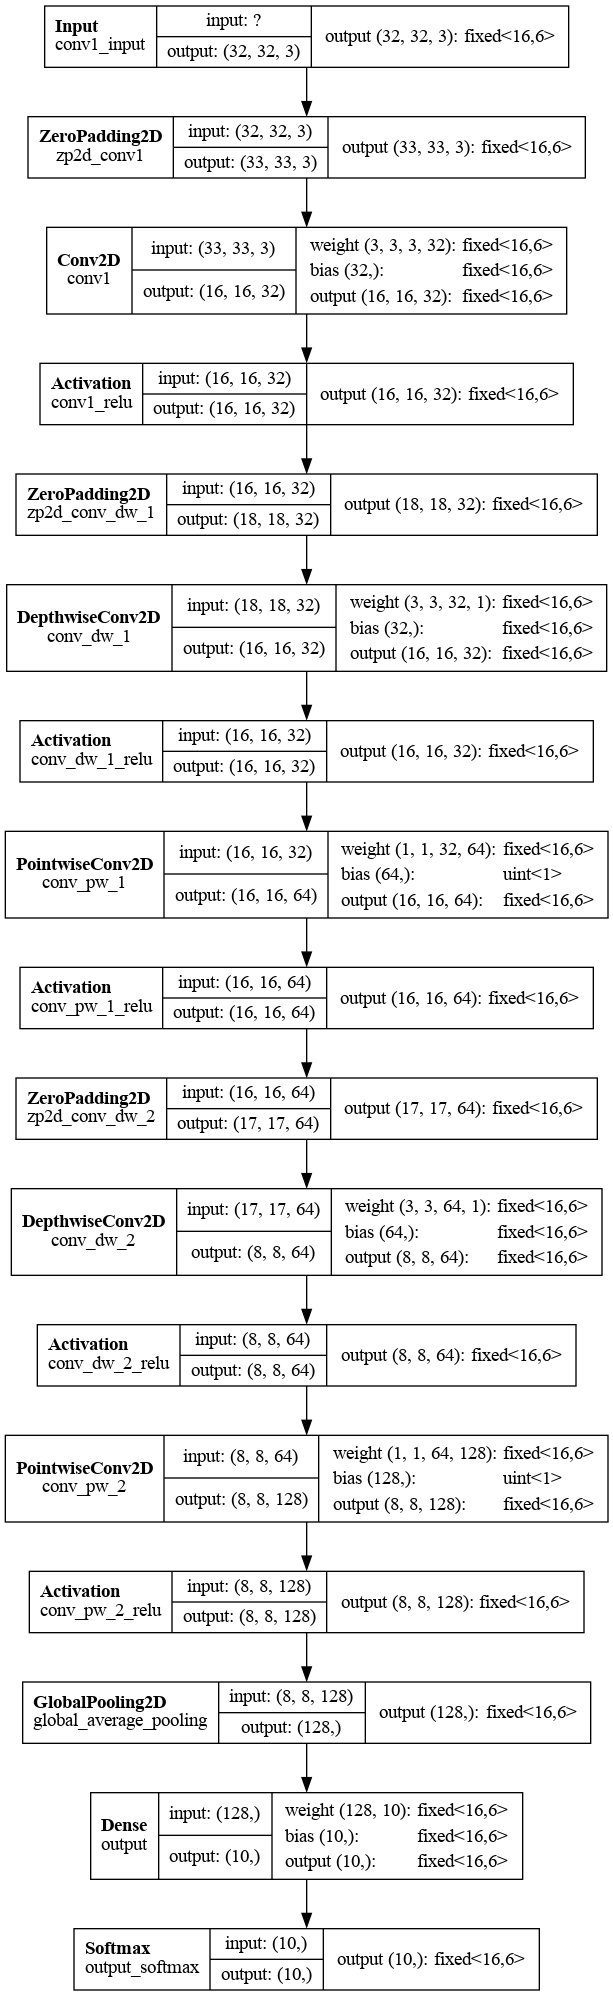

In [26]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [28]:
# os.environ['PATH'] = '/opt/Xilinx//Vitis_HLS/2024.1/bin:' + os.environ['PATH']
os.environ['PATH'] = os.environ['XILINX_VIVADO'] + '/bin:' + os.environ['PATH']

hls_model.build(csim=False, synth=True, vsynth=True)

Exception: Vivado HLS installation not found. Make sure "vivado_hls" is on PATH.